In [14]:
# Library Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# NOTE!!! CODE REQUIRED TO RECIEVE INPUT VARIABLES  s_date, e_date

# WIP TEST VARIABLE COMMENT
# s_date = '2019-04-19'
# e_date = '2019-05-19'

# Datetime allocation
s_date = datetime.strptime(s_date, "%Y-%m-%d") # INPUT MUST BE IN THIS FORMAT
e_date = datetime.strptime(e_date, "%Y-%m-%d")

In [3]:
# Load Data
calendar_df = pd.read_csv("Data/calendar_dec18.csv")

# Datframe Convertions

#date to datetime datatype
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

#listing_id to id in calendar_df
calendar_df.rename(columns={'listing_id': 'id'}, inplace=True)

In [4]:
# Filtering by dates
def date_filtered_listings(calendar_df,s_date, e_date):
    fprice_df = calendar_df[((calendar_df['date'] > s_date) & (calendar_df['date'] < e_date))]
    return fprice_df
    # Outputs data frame containing filtered listings 

In [5]:
# Execute functions
fprice_df = date_filtered_listings(calendar_df,s_date, e_date)
fprice_df

,id,date,available,price
92,12351,2019-05-18,t,$103.00
93,12351,2019-05-17,t,$103.00
94,12351,2019-05-16,t,$103.00
95,12351,2019-05-15,t,$103.00
96,12351,2019-05-14,t,$103.00
...,...,...,...,...
13381028,30540048,2019-04-24,f,NaN
13381029,30540048,2019-04-23,f,NaN
13381030,30540048,2019-04-22,f,NaN
13381031,30540048,2019-04-21,f,NaN


In [6]:
# Drop Unneed Attributes
fprice_df = fprice_df.drop('available', axis=1)
fprice_df = fprice_df.reset_index(drop=True)
fprice_df

,id,date,price
0,12351,2019-05-18,$103.00
1,12351,2019-05-17,$103.00
2,12351,2019-05-16,$103.00
3,12351,2019-05-15,$103.00
4,12351,2019-05-14,$103.00
...,...,...,...
1063164,30540048,2019-04-24,NaN
1063165,30540048,2019-04-23,NaN
1063166,30540048,2019-04-22,NaN
1063167,30540048,2019-04-21,NaN


In [7]:
# Remove rows where 'price' is NaN
fprice_df = fprice_df.dropna(subset=['price'])

# Convert price datatype to float
fprice_df['price'] = fprice_df['price'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\zhard\AppData\Local\Temp\ipykernel_13144\4045020054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fprice_df['price'] = fprice_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
# Drop duplicates of id and price and then sort by id and price
fprice_df = fprice_df.drop_duplicates(subset=['id', 'price']).sort_values(by=['id', 'price'])
fprice_df

,id,date,price
28,12351,2019-04-20,99.0
25,12351,2019-04-23,100.0
21,12351,2019-04-27,101.0
14,12351,2019-05-04,102.0
0,12351,2019-05-18,103.0
...,...,...,...
1059305,30592081,2019-05-05,193.0
1059299,30592081,2019-05-11,194.0
1059294,30592081,2019-05-16,195.0
1059292,30592081,2019-05-18,196.0


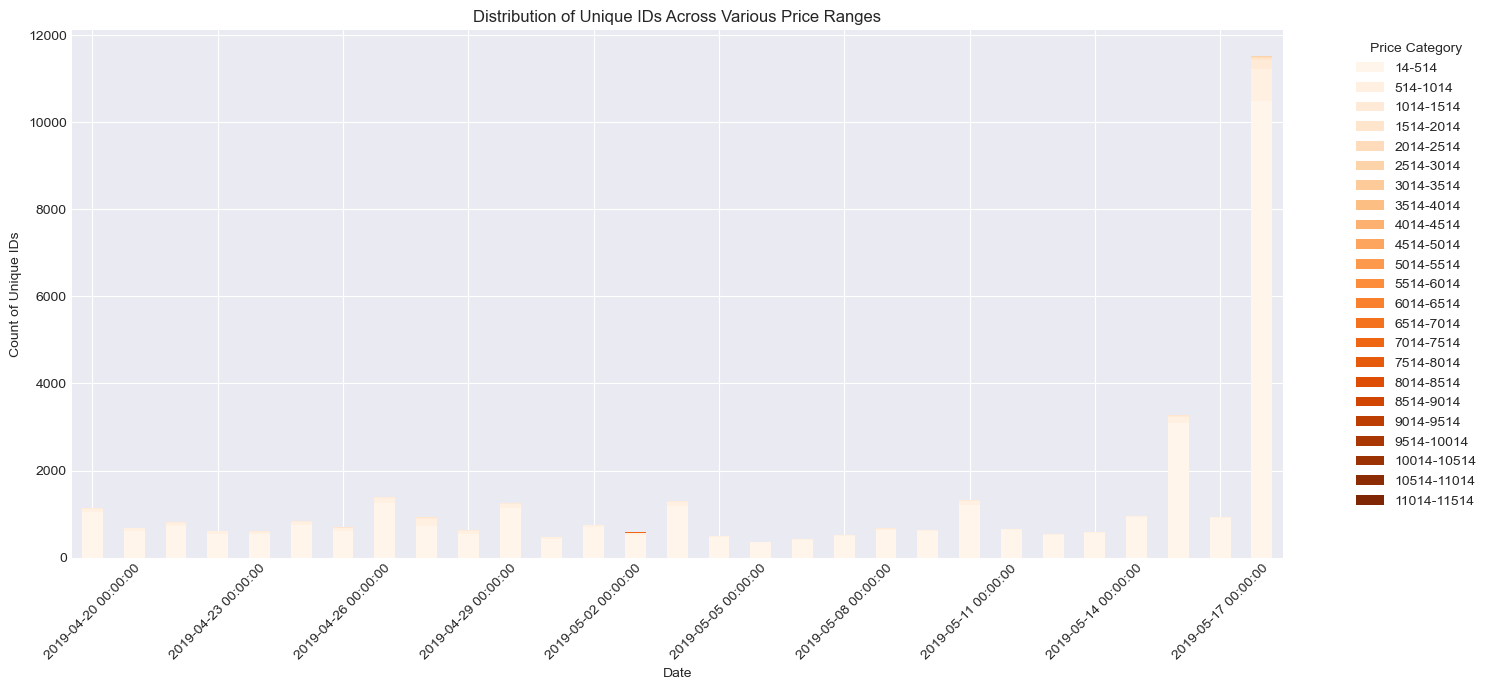

In [25]:
# Dynamically make bins and labels

min_price = fprice_df["price"].min()
max_price = fprice_df["price"].max()
b_width = 500
b = list(range(int(np.floor(min_price)), int(np.ceil(max_price)) + b_width, b_width))
l = [f'{i}-{j}' for i, j in zip(b[:-1], b[1:])]

# Create price category column
fprice_df['price_category'] = pd.cut(fprice_df['price'], bins=b, labels=l)

# Group by date and price and, count unique id
fprice_df_grouped = fprice_df.groupby(['date', 'price_category'])['id'].nunique().reset_index()

# Make price categories become columns
fprice_df_pivot_grouped = fprice_df_grouped.pivot(index='date', columns='price_category', values='id')

# Plot
ax = fprice_df_pivot_grouped.plot(kind='bar', stacked=True, figsize=(15,7), cmap='Oranges')
plt.title('Distribution of Unique IDs Across Various Price Ranges')
plt.xlabel('Date')
plt.ylabel('Count of Unique IDs')
plt.legend(title='Price Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# display fewer x-axis labels
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("price_distribution.png", dpi=300, bbox_inches='tight')